<a href="https://colab.research.google.com/github/mihirn07/DIY_FaceApp_SOC/blob/main/Final_Submission/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils import data
import torchvision.datasets as datasets
from torchvision import transforms
device = torch.device("cuda")

In [91]:
data_transforms = transforms.Compose([transforms.ToTensor()])
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=data_transforms)

In [92]:
batch_size=100
train_dataloader = data.DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True)

In [93]:
def noise(batch_size):
    return torch.randn(batch_size,100)

In [94]:
class Discriminator(nn.Module):

    def __init__(self):
        super(Discriminator, self).__init__()
        
        self.fcl1 = nn.Sequential( 
            nn.Linear(784, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.fcl2 = nn.Sequential(
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.fcl3 = nn.Sequential(
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.out = nn.Sequential(
            torch.nn.Linear(256, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.fcl1(x)
        x = self.fcl2(x)
        x = self.fcl3(x)
        x = self.out(x)
        return x

In [100]:
class Generator(nn.Module):

    def __init__(self):
        super(Generator, self).__init__()
        
        self.fcl1 = nn.Sequential(
            nn.Linear(100, 256),
            nn.LeakyReLU(0.2)
        )
        self.fcl2 = nn.Sequential(            
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2)
        )
        self.fcl3 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2)
        )
        
        self.out = nn.Sequential(
            nn.Linear(1024, 784),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.fcl1(x)
        x = self.fcl2(x)
        x = self.fcl3(x)
        x = self.out(x)
        return x

In [101]:
model_dis = Discriminator()
model_gen = Generator()
model_dis = model_dis.to(device)
model_gen = model_gen.to(device)

# Loss functions & Optimizers
criterion_d = nn.BCELoss()
optimizer_d = optim.SGD(model_dis.parameters(), lr=1e-3, momentum=0.9)

criterion_g = nn.BCELoss()
optimizer_g = optim.SGD(model_gen.parameters(), lr=1e-3, momentum = 0.9)

In [102]:
def show_img(array, axis, i, j):
    array = array.reshape(28,28)
    
    axis[i, j].imshow(array,cmap='binary')

In [103]:
def train_discriminator(optimizer, loss_func, real_data, fake_data):

    N = real_data.size(0)

    # Reset gradients
    optimizer.zero_grad()
    
    # 1.1 Train on Real Data
    prediction_real = model_dis(real_data)

    # Calculate error and backpropagate
    error_real = loss_func(prediction_real, Variable(torch.ones(N, 1)).to(device))
    error_real.backward()

    # 1.2 Train on Fake Data
    prediction_fake = model_dis(fake_data)

    # Calculate error and backpropagate
    error_fake = loss_func(prediction_fake, Variable(torch.zeros(N, 1)).to(device))
    error_fake.backward()

    # 1.3 Update weights with gradients
    optimizer.step() 

    error_fake = error_fake.detach().cpu().numpy()
    error_real = error_real.detach().cpu().numpy()
    prediction_real = prediction_real.detach().cpu().numpy()
    prediction_fake = prediction_fake.detach().cpu().numpy()

    # Return error and predictions for real and fake inputs
    return error_real + error_fake, prediction_real, prediction_fake

In [104]:
def train_generator(optimizer, loss_func, fake_data):

    N = fake_data.size(0)

    # Reset gradients
    optimizer.zero_grad()

    # Sample noise and generate fake data
    prediction = model_dis(fake_data)

    # Calculate error and backpropagate
    error = loss_func(prediction, Variable(torch.ones(N, 1)).to(device))
    error.backward()

    # Update weights with gradients
    optimizer.step()

    error = error.detach().cpu().numpy()

    return error

In [105]:
samples = 9
val_noise = noise(samples)

generator_error = []
discriminator_error = []

epochs = 80

Epoch: 0
	Batch: 1	Discriminator Error: 1.387856	Generator Error: 0.669879
	Batch: 200	Discriminator Error: 0.733593	Generator Error: 0.802413
	Batch: 400	Discriminator Error: 1.481660	Generator Error: 1.032846
	Batch: 600	Discriminator Error: 0.889666	Generator Error: 3.018035


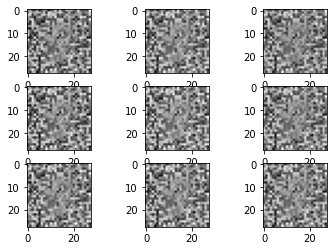

Epoch: 1
	Batch: 1	Discriminator Error: 1.117062	Generator Error: 2.937561
	Batch: 200	Discriminator Error: 1.256437	Generator Error: 0.708981
	Batch: 400	Discriminator Error: 1.020189	Generator Error: 1.253191
	Batch: 600	Discriminator Error: 0.626642	Generator Error: 1.370784


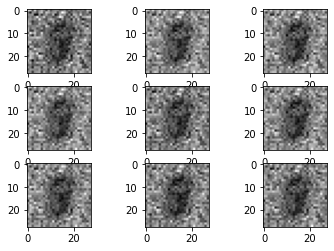

Epoch: 2
	Batch: 1	Discriminator Error: 0.601544	Generator Error: 1.387612
	Batch: 200	Discriminator Error: 1.146511	Generator Error: 2.023101
	Batch: 400	Discriminator Error: 1.002643	Generator Error: 3.834634
	Batch: 600	Discriminator Error: 0.166494	Generator Error: 2.972091


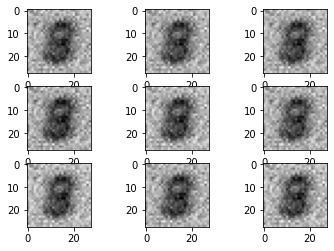

Epoch: 3
	Batch: 1	Discriminator Error: 0.162782	Generator Error: 2.914223
	Batch: 200	Discriminator Error: 0.632670	Generator Error: 3.258544
	Batch: 400	Discriminator Error: 1.109939	Generator Error: 1.072250
	Batch: 600	Discriminator Error: 0.188979	Generator Error: 2.401330


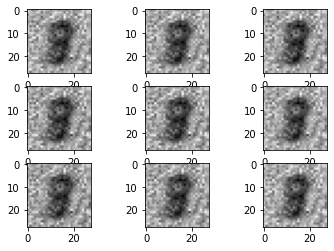

Epoch: 4
	Batch: 1	Discriminator Error: 0.181914	Generator Error: 2.492875
	Batch: 200	Discriminator Error: 0.457166	Generator Error: 2.725690
	Batch: 400	Discriminator Error: 0.322607	Generator Error: 2.293646
	Batch: 600	Discriminator Error: 1.023170	Generator Error: 3.721144


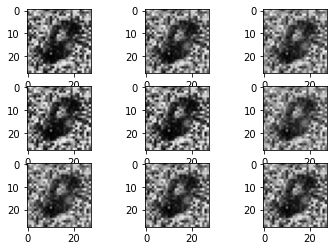

Epoch: 5
	Batch: 1	Discriminator Error: 0.822066	Generator Error: 3.963842
	Batch: 200	Discriminator Error: 0.508370	Generator Error: 2.304679
	Batch: 400	Discriminator Error: 0.280431	Generator Error: 3.239356
	Batch: 600	Discriminator Error: 0.243655	Generator Error: 3.236796


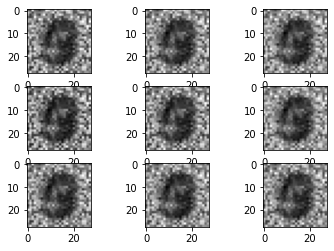

Epoch: 6
	Batch: 1	Discriminator Error: 0.325937	Generator Error: 3.345787
	Batch: 200	Discriminator Error: 0.175923	Generator Error: 3.260043
	Batch: 400	Discriminator Error: 0.275694	Generator Error: 2.495697
	Batch: 600	Discriminator Error: 0.417223	Generator Error: 4.415616


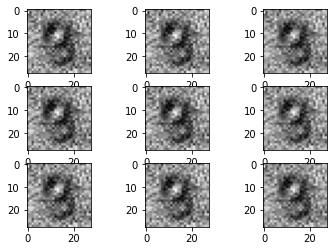

Epoch: 7
	Batch: 1	Discriminator Error: 0.368422	Generator Error: 4.154610
	Batch: 200	Discriminator Error: 0.673377	Generator Error: 2.389408
	Batch: 400	Discriminator Error: 0.122725	Generator Error: 3.278709
	Batch: 600	Discriminator Error: 0.066649	Generator Error: 4.477276


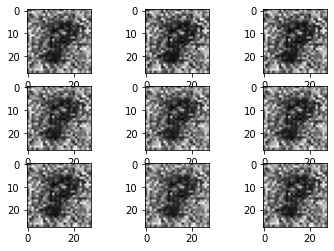

Epoch: 8
	Batch: 1	Discriminator Error: 0.147909	Generator Error: 4.767940
	Batch: 200	Discriminator Error: 0.153371	Generator Error: 3.888876
	Batch: 400	Discriminator Error: 0.257712	Generator Error: 3.227347
	Batch: 600	Discriminator Error: 0.364381	Generator Error: 2.438744


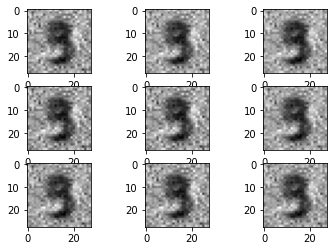

Epoch: 9
	Batch: 1	Discriminator Error: 0.333896	Generator Error: 2.270918
	Batch: 200	Discriminator Error: 0.249766	Generator Error: 3.565708
	Batch: 400	Discriminator Error: 0.392897	Generator Error: 3.345394
	Batch: 600	Discriminator Error: 0.284981	Generator Error: 3.888801


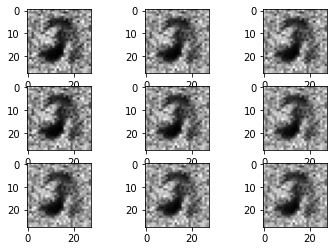

Epoch: 10
	Batch: 1	Discriminator Error: 0.295177	Generator Error: 3.645138
	Batch: 200	Discriminator Error: 0.582651	Generator Error: 3.414432
	Batch: 400	Discriminator Error: 0.133129	Generator Error: 3.323662
	Batch: 600	Discriminator Error: 0.661582	Generator Error: 3.740693


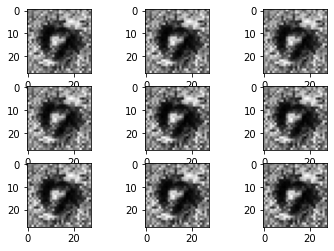

Epoch: 11
	Batch: 1	Discriminator Error: 0.767478	Generator Error: 3.524788
	Batch: 200	Discriminator Error: 0.199849	Generator Error: 2.970920
	Batch: 400	Discriminator Error: 0.359532	Generator Error: 4.276003
	Batch: 600	Discriminator Error: 0.413752	Generator Error: 2.112754


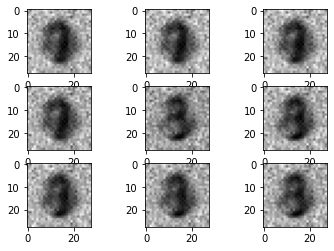

Epoch: 12
	Batch: 1	Discriminator Error: 0.402714	Generator Error: 2.142929
	Batch: 200	Discriminator Error: 0.332065	Generator Error: 2.353661
	Batch: 400	Discriminator Error: 0.280273	Generator Error: 3.415337
	Batch: 600	Discriminator Error: 0.207127	Generator Error: 2.635783


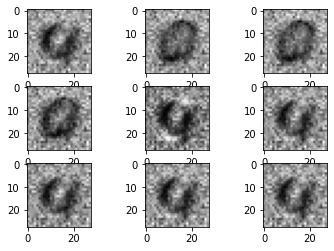

Epoch: 13
	Batch: 1	Discriminator Error: 0.176985	Generator Error: 2.582066
	Batch: 200	Discriminator Error: 0.298429	Generator Error: 3.950635
	Batch: 400	Discriminator Error: 0.207870	Generator Error: 2.734022
	Batch: 600	Discriminator Error: 0.642916	Generator Error: 3.021992


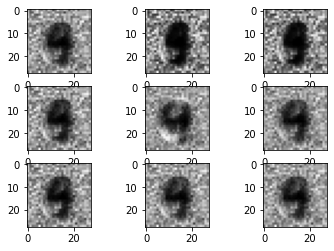

Epoch: 14
	Batch: 1	Discriminator Error: 0.413428	Generator Error: 3.048851
	Batch: 200	Discriminator Error: 0.352549	Generator Error: 2.613831
	Batch: 400	Discriminator Error: 0.285730	Generator Error: 3.589856
	Batch: 600	Discriminator Error: 0.355022	Generator Error: 3.166166


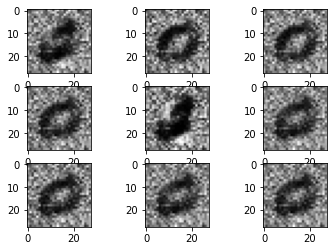

Epoch: 15
	Batch: 1	Discriminator Error: 0.313230	Generator Error: 3.232405
	Batch: 200	Discriminator Error: 0.319212	Generator Error: 3.102216
	Batch: 400	Discriminator Error: 0.492725	Generator Error: 3.062933
	Batch: 600	Discriminator Error: 0.262378	Generator Error: 3.130787


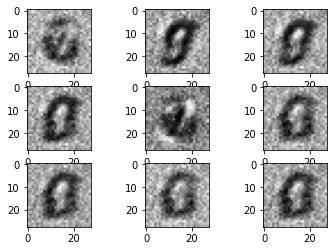

Epoch: 16
	Batch: 1	Discriminator Error: 0.330877	Generator Error: 2.878695
	Batch: 200	Discriminator Error: 0.199790	Generator Error: 3.736104
	Batch: 400	Discriminator Error: 0.137957	Generator Error: 3.666229
	Batch: 600	Discriminator Error: 0.555677	Generator Error: 3.965674


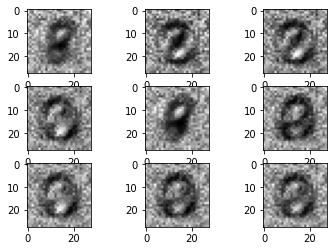

Epoch: 17
	Batch: 1	Discriminator Error: 0.436333	Generator Error: 3.770112
	Batch: 200	Discriminator Error: 0.203262	Generator Error: 3.371879
	Batch: 400	Discriminator Error: 0.274895	Generator Error: 4.075629
	Batch: 600	Discriminator Error: 0.281019	Generator Error: 4.003362


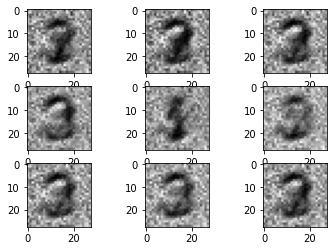

Epoch: 18
	Batch: 1	Discriminator Error: 0.365375	Generator Error: 4.147587
	Batch: 200	Discriminator Error: 0.686321	Generator Error: 3.017932
	Batch: 400	Discriminator Error: 0.246099	Generator Error: 3.382863
	Batch: 600	Discriminator Error: 0.331846	Generator Error: 3.464587


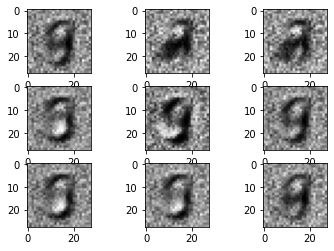

Epoch: 19
	Batch: 1	Discriminator Error: 0.154763	Generator Error: 3.728180
	Batch: 200	Discriminator Error: 0.195121	Generator Error: 3.224128
	Batch: 400	Discriminator Error: 0.193243	Generator Error: 3.772086
	Batch: 600	Discriminator Error: 0.320933	Generator Error: 3.664009


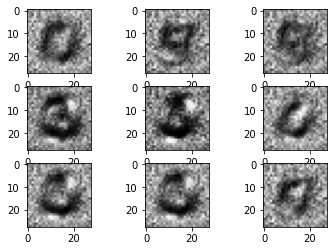

Epoch: 20
	Batch: 1	Discriminator Error: 0.197215	Generator Error: 3.636038
	Batch: 200	Discriminator Error: 0.113577	Generator Error: 3.677629
	Batch: 400	Discriminator Error: 0.166378	Generator Error: 3.808271
	Batch: 600	Discriminator Error: 0.275337	Generator Error: 3.385307


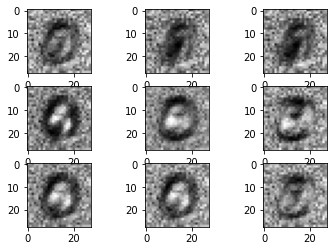

Epoch: 21
	Batch: 1	Discriminator Error: 0.274687	Generator Error: 3.696611
	Batch: 200	Discriminator Error: 0.416261	Generator Error: 4.072591
	Batch: 400	Discriminator Error: 0.121445	Generator Error: 3.460222
	Batch: 600	Discriminator Error: 0.195522	Generator Error: 3.784193


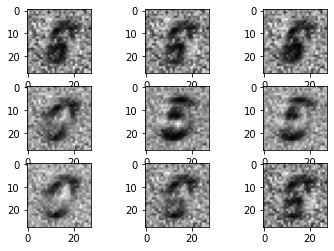

Epoch: 22
	Batch: 1	Discriminator Error: 0.160222	Generator Error: 3.701421
	Batch: 200	Discriminator Error: 0.295646	Generator Error: 3.567348
	Batch: 400	Discriminator Error: 0.443815	Generator Error: 3.685851
	Batch: 600	Discriminator Error: 0.256999	Generator Error: 3.497692


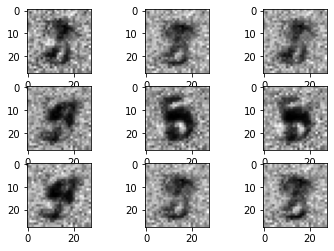

Epoch: 23
	Batch: 1	Discriminator Error: 0.209131	Generator Error: 3.297542
	Batch: 200	Discriminator Error: 0.183548	Generator Error: 4.242489
	Batch: 400	Discriminator Error: 0.450837	Generator Error: 3.721061
	Batch: 600	Discriminator Error: 0.312272	Generator Error: 3.545654


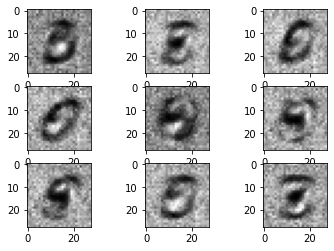

Epoch: 24
	Batch: 1	Discriminator Error: 0.094950	Generator Error: 3.413334
	Batch: 200	Discriminator Error: 0.263352	Generator Error: 3.081177
	Batch: 400	Discriminator Error: 0.254753	Generator Error: 3.541576
	Batch: 600	Discriminator Error: 0.256123	Generator Error: 3.446580


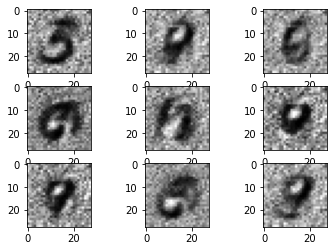

Epoch: 25
	Batch: 1	Discriminator Error: 0.209942	Generator Error: 3.681510
	Batch: 200	Discriminator Error: 0.306043	Generator Error: 3.272428
	Batch: 400	Discriminator Error: 0.287072	Generator Error: 3.833575
	Batch: 600	Discriminator Error: 0.287357	Generator Error: 4.030453


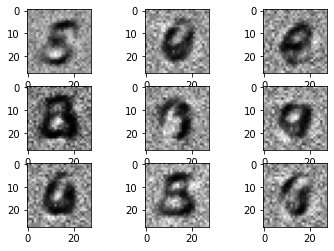

Epoch: 26
	Batch: 1	Discriminator Error: 0.247877	Generator Error: 3.912586
	Batch: 200	Discriminator Error: 0.299821	Generator Error: 3.753898
	Batch: 400	Discriminator Error: 0.354064	Generator Error: 3.455274
	Batch: 600	Discriminator Error: 0.365280	Generator Error: 3.364573


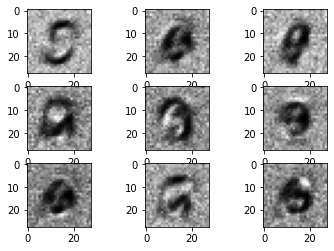

Epoch: 27
	Batch: 1	Discriminator Error: 0.254504	Generator Error: 3.415858
	Batch: 200	Discriminator Error: 0.501639	Generator Error: 4.086010
	Batch: 400	Discriminator Error: 0.257398	Generator Error: 3.735825
	Batch: 600	Discriminator Error: 0.244502	Generator Error: 3.402626


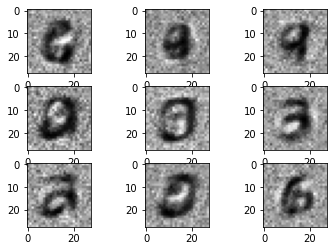

Epoch: 28
	Batch: 1	Discriminator Error: 0.296991	Generator Error: 3.377216
	Batch: 200	Discriminator Error: 0.223290	Generator Error: 3.683340
	Batch: 400	Discriminator Error: 0.449929	Generator Error: 3.338241
	Batch: 600	Discriminator Error: 0.337245	Generator Error: 4.173596


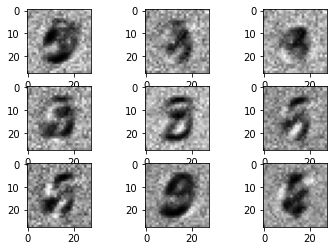

Epoch: 29
	Batch: 1	Discriminator Error: 0.547669	Generator Error: 3.436112
	Batch: 200	Discriminator Error: 0.429492	Generator Error: 3.858672
	Batch: 400	Discriminator Error: 0.262818	Generator Error: 3.869615
	Batch: 600	Discriminator Error: 0.300609	Generator Error: 3.505057


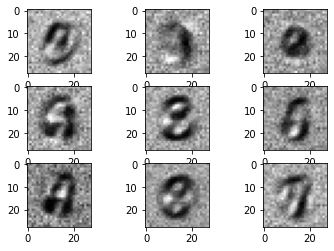

Epoch: 30
	Batch: 1	Discriminator Error: 0.351875	Generator Error: 3.550711
	Batch: 200	Discriminator Error: 0.395016	Generator Error: 4.459535
	Batch: 400	Discriminator Error: 0.332052	Generator Error: 3.941277
	Batch: 600	Discriminator Error: 0.361891	Generator Error: 3.954995


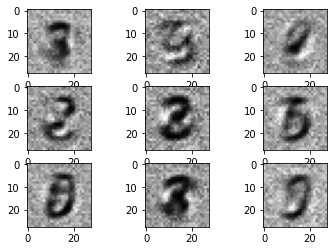

Epoch: 31
	Batch: 1	Discriminator Error: 0.262537	Generator Error: 4.071912
	Batch: 200	Discriminator Error: 0.397186	Generator Error: 4.553900
	Batch: 400	Discriminator Error: 0.172975	Generator Error: 4.164469
	Batch: 600	Discriminator Error: 0.358109	Generator Error: 3.438328


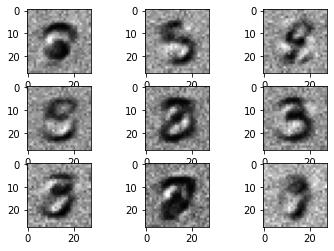

Epoch: 32
	Batch: 1	Discriminator Error: 0.430976	Generator Error: 3.522657
	Batch: 200	Discriminator Error: 0.282688	Generator Error: 4.078280
	Batch: 400	Discriminator Error: 0.385931	Generator Error: 3.500716
	Batch: 600	Discriminator Error: 0.317578	Generator Error: 4.812067


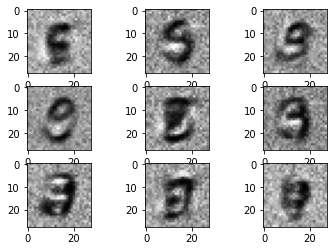

Epoch: 33
	Batch: 1	Discriminator Error: 0.292605	Generator Error: 4.812488
	Batch: 200	Discriminator Error: 0.291527	Generator Error: 3.921810
	Batch: 400	Discriminator Error: 0.235477	Generator Error: 3.727535
	Batch: 600	Discriminator Error: 0.331108	Generator Error: 3.788908


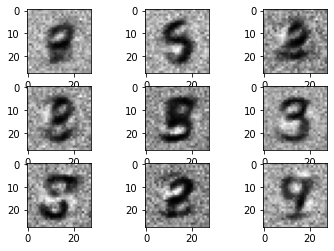

Epoch: 34
	Batch: 1	Discriminator Error: 0.208425	Generator Error: 4.030872
	Batch: 200	Discriminator Error: 0.239520	Generator Error: 4.788891
	Batch: 400	Discriminator Error: 0.218217	Generator Error: 3.522796
	Batch: 600	Discriminator Error: 0.320664	Generator Error: 3.748106


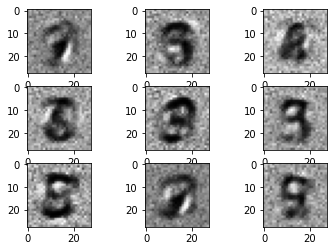

Epoch: 35
	Batch: 1	Discriminator Error: 0.249117	Generator Error: 3.824902
	Batch: 200	Discriminator Error: 0.393971	Generator Error: 3.551594
	Batch: 400	Discriminator Error: 0.342924	Generator Error: 4.146972
	Batch: 600	Discriminator Error: 0.305201	Generator Error: 4.012214


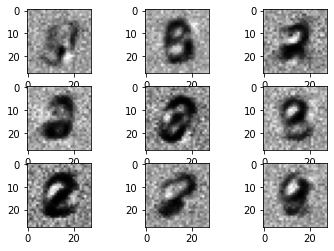

Epoch: 36
	Batch: 1	Discriminator Error: 0.293447	Generator Error: 4.067279
	Batch: 200	Discriminator Error: 0.294000	Generator Error: 4.006672
	Batch: 400	Discriminator Error: 0.086513	Generator Error: 4.668987
	Batch: 600	Discriminator Error: 0.455062	Generator Error: 4.526844


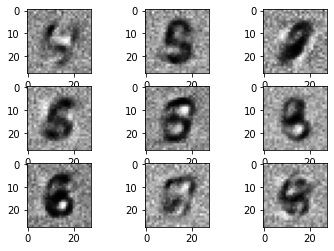

Epoch: 37
	Batch: 1	Discriminator Error: 0.368007	Generator Error: 4.072815
	Batch: 200	Discriminator Error: 0.198486	Generator Error: 4.005719
	Batch: 400	Discriminator Error: 0.279161	Generator Error: 4.036324
	Batch: 600	Discriminator Error: 0.274173	Generator Error: 3.861025


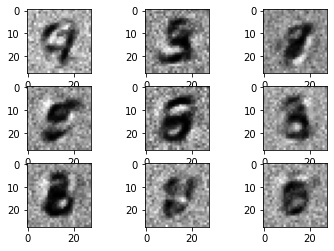

Epoch: 38
	Batch: 1	Discriminator Error: 0.382902	Generator Error: 3.974640
	Batch: 200	Discriminator Error: 0.433112	Generator Error: 3.823679
	Batch: 400	Discriminator Error: 0.376355	Generator Error: 3.609412
	Batch: 600	Discriminator Error: 0.394850	Generator Error: 3.718793


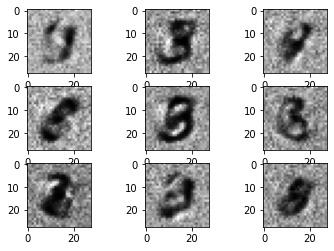

Epoch: 39
	Batch: 1	Discriminator Error: 0.298733	Generator Error: 3.915421
	Batch: 200	Discriminator Error: 0.135863	Generator Error: 4.045026
	Batch: 400	Discriminator Error: 0.332151	Generator Error: 3.650358
	Batch: 600	Discriminator Error: 0.253991	Generator Error: 3.795829


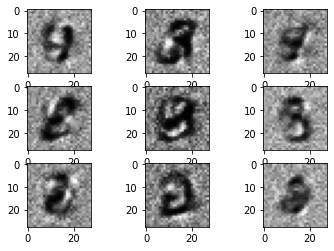

Epoch: 40
	Batch: 1	Discriminator Error: 0.231823	Generator Error: 3.577116
	Batch: 200	Discriminator Error: 0.307254	Generator Error: 4.018275
	Batch: 400	Discriminator Error: 0.226559	Generator Error: 3.743069
	Batch: 600	Discriminator Error: 0.422372	Generator Error: 3.757095


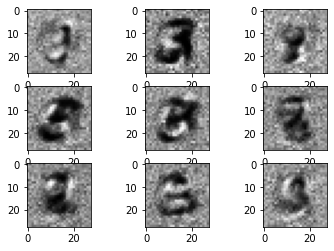

Epoch: 41
	Batch: 1	Discriminator Error: 0.322084	Generator Error: 3.502133
	Batch: 200	Discriminator Error: 0.252772	Generator Error: 3.940407
	Batch: 400	Discriminator Error: 0.379623	Generator Error: 3.765129
	Batch: 600	Discriminator Error: 0.276771	Generator Error: 4.769365


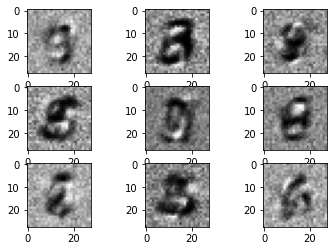

Epoch: 42
	Batch: 1	Discriminator Error: 0.191686	Generator Error: 4.402559
	Batch: 200	Discriminator Error: 0.284468	Generator Error: 3.786022
	Batch: 400	Discriminator Error: 0.266645	Generator Error: 4.434414
	Batch: 600	Discriminator Error: 0.400054	Generator Error: 3.974919


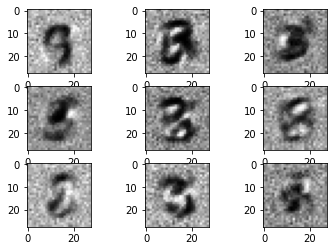

Epoch: 43
	Batch: 1	Discriminator Error: 0.436464	Generator Error: 4.351184
	Batch: 200	Discriminator Error: 0.210683	Generator Error: 3.932293
	Batch: 400	Discriminator Error: 0.261995	Generator Error: 4.538506
	Batch: 600	Discriminator Error: 0.287740	Generator Error: 3.571486


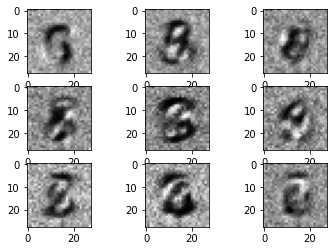

Epoch: 44
	Batch: 1	Discriminator Error: 0.330499	Generator Error: 3.386336
	Batch: 200	Discriminator Error: 0.256375	Generator Error: 3.524360
	Batch: 400	Discriminator Error: 0.175915	Generator Error: 3.713265
	Batch: 600	Discriminator Error: 0.315007	Generator Error: 3.470951


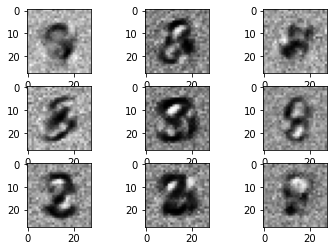

Epoch: 45
	Batch: 1	Discriminator Error: 0.379265	Generator Error: 3.745789
	Batch: 200	Discriminator Error: 0.219136	Generator Error: 4.150143
	Batch: 400	Discriminator Error: 0.210693	Generator Error: 3.715019
	Batch: 600	Discriminator Error: 0.222800	Generator Error: 4.231562


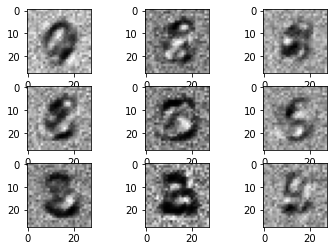

Epoch: 46
	Batch: 1	Discriminator Error: 0.316342	Generator Error: 4.054993
	Batch: 200	Discriminator Error: 0.417291	Generator Error: 3.687555
	Batch: 400	Discriminator Error: 0.205025	Generator Error: 4.048920
	Batch: 600	Discriminator Error: 0.356859	Generator Error: 4.026399


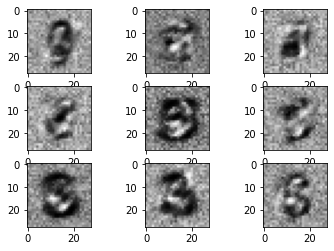

Epoch: 47
	Batch: 1	Discriminator Error: 0.376300	Generator Error: 3.659417
	Batch: 200	Discriminator Error: 0.277261	Generator Error: 3.521103
	Batch: 400	Discriminator Error: 0.325849	Generator Error: 3.914018
	Batch: 600	Discriminator Error: 0.202568	Generator Error: 3.989187


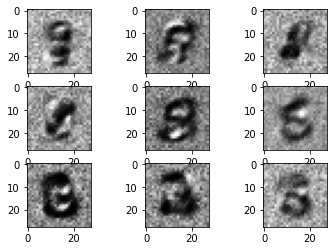

Epoch: 48
	Batch: 1	Discriminator Error: 0.205100	Generator Error: 3.715250
	Batch: 200	Discriminator Error: 0.401186	Generator Error: 3.520684
	Batch: 400	Discriminator Error: 0.244842	Generator Error: 3.614366
	Batch: 600	Discriminator Error: 0.425925	Generator Error: 3.547974


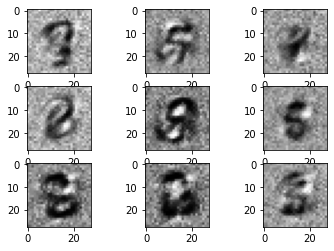

Epoch: 49
	Batch: 1	Discriminator Error: 0.591604	Generator Error: 3.519885
	Batch: 200	Discriminator Error: 0.259072	Generator Error: 3.741041
	Batch: 400	Discriminator Error: 0.389259	Generator Error: 3.995922
	Batch: 600	Discriminator Error: 0.312176	Generator Error: 4.294296


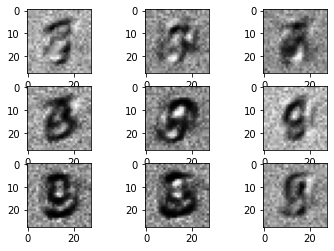

Epoch: 50
	Batch: 1	Discriminator Error: 0.180473	Generator Error: 4.348999
	Batch: 200	Discriminator Error: 0.244074	Generator Error: 3.651422
	Batch: 400	Discriminator Error: 0.336717	Generator Error: 4.387836
	Batch: 600	Discriminator Error: 0.416897	Generator Error: 3.553979


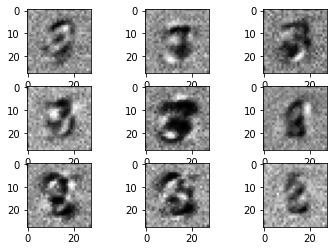

Epoch: 51
	Batch: 1	Discriminator Error: 0.534344	Generator Error: 3.669069
	Batch: 200	Discriminator Error: 0.328591	Generator Error: 3.964319
	Batch: 400	Discriminator Error: 0.356287	Generator Error: 3.596493
	Batch: 600	Discriminator Error: 0.265931	Generator Error: 3.596207


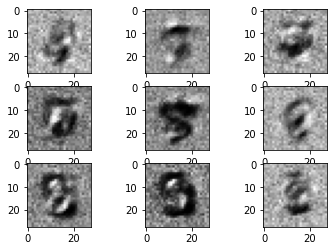

Epoch: 52
	Batch: 1	Discriminator Error: 0.273601	Generator Error: 3.768137
	Batch: 200	Discriminator Error: 0.326741	Generator Error: 3.695496
	Batch: 400	Discriminator Error: 0.355025	Generator Error: 4.194916
	Batch: 600	Discriminator Error: 0.282782	Generator Error: 4.024200


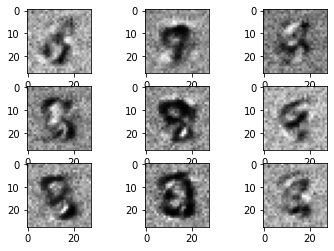

Epoch: 53
	Batch: 1	Discriminator Error: 0.429352	Generator Error: 4.311191
	Batch: 200	Discriminator Error: 0.424992	Generator Error: 3.830752
	Batch: 400	Discriminator Error: 0.359222	Generator Error: 3.906200
	Batch: 600	Discriminator Error: 0.262317	Generator Error: 3.436323


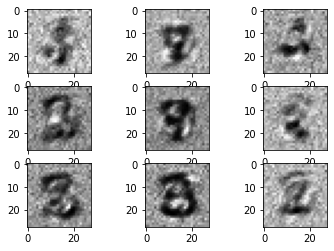

Epoch: 54
	Batch: 1	Discriminator Error: 0.302322	Generator Error: 3.568193
	Batch: 200	Discriminator Error: 0.427944	Generator Error: 3.851185
	Batch: 400	Discriminator Error: 0.184898	Generator Error: 3.511044
	Batch: 600	Discriminator Error: 0.328960	Generator Error: 3.737561


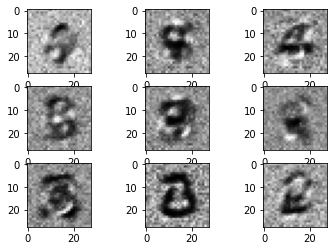

Epoch: 55
	Batch: 1	Discriminator Error: 0.191507	Generator Error: 3.904811
	Batch: 200	Discriminator Error: 0.196332	Generator Error: 3.844455
	Batch: 400	Discriminator Error: 0.353420	Generator Error: 3.560808
	Batch: 600	Discriminator Error: 0.397911	Generator Error: 3.570909


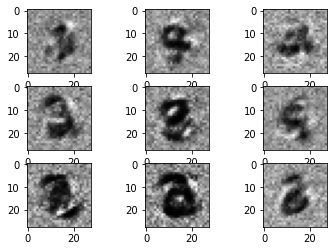

Epoch: 56
	Batch: 1	Discriminator Error: 0.360429	Generator Error: 3.633967
	Batch: 200	Discriminator Error: 0.447752	Generator Error: 3.307320
	Batch: 400	Discriminator Error: 0.263233	Generator Error: 3.973267
	Batch: 600	Discriminator Error: 0.360481	Generator Error: 3.957979


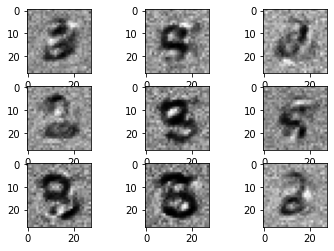

Epoch: 57
	Batch: 1	Discriminator Error: 0.496194	Generator Error: 4.324489
	Batch: 200	Discriminator Error: 0.387091	Generator Error: 3.717487
	Batch: 400	Discriminator Error: 0.236444	Generator Error: 4.137063
	Batch: 600	Discriminator Error: 0.262811	Generator Error: 3.612139


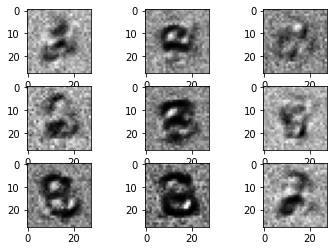

Epoch: 58
	Batch: 1	Discriminator Error: 0.346697	Generator Error: 3.754214
	Batch: 200	Discriminator Error: 0.447186	Generator Error: 3.474813
	Batch: 400	Discriminator Error: 0.350508	Generator Error: 3.857627
	Batch: 600	Discriminator Error: 0.160615	Generator Error: 4.265213


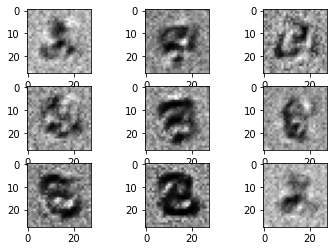

Epoch: 59
	Batch: 1	Discriminator Error: 0.358044	Generator Error: 4.045626
	Batch: 200	Discriminator Error: 0.287610	Generator Error: 3.377890
	Batch: 400	Discriminator Error: 0.323987	Generator Error: 3.715957
	Batch: 600	Discriminator Error: 0.324991	Generator Error: 4.299108


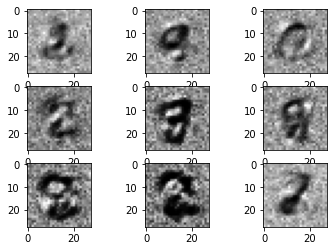

Epoch: 60
	Batch: 1	Discriminator Error: 0.278885	Generator Error: 4.456947
	Batch: 200	Discriminator Error: 0.217226	Generator Error: 3.918668
	Batch: 400	Discriminator Error: 0.261036	Generator Error: 3.647991
	Batch: 600	Discriminator Error: 0.241143	Generator Error: 4.121193


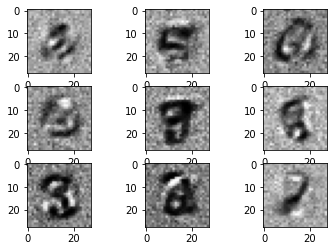

Epoch: 61
	Batch: 1	Discriminator Error: 0.333731	Generator Error: 3.751575
	Batch: 200	Discriminator Error: 0.333690	Generator Error: 3.841590
	Batch: 400	Discriminator Error: 0.369231	Generator Error: 4.279092
	Batch: 600	Discriminator Error: 0.354670	Generator Error: 3.703656


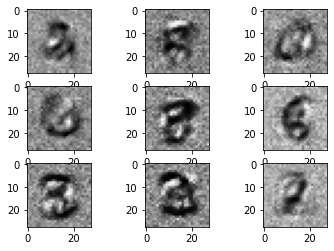

Epoch: 62
	Batch: 1	Discriminator Error: 0.464316	Generator Error: 3.925895
	Batch: 200	Discriminator Error: 0.255104	Generator Error: 3.892101
	Batch: 400	Discriminator Error: 0.228678	Generator Error: 3.976771
	Batch: 600	Discriminator Error: 0.323654	Generator Error: 3.440895


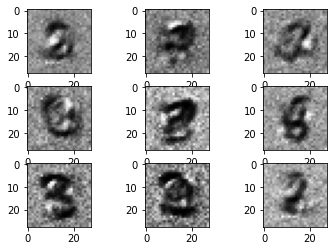

Epoch: 63
	Batch: 1	Discriminator Error: 0.271288	Generator Error: 3.821111
	Batch: 200	Discriminator Error: 0.334779	Generator Error: 4.193466
	Batch: 400	Discriminator Error: 0.272163	Generator Error: 3.745376
	Batch: 600	Discriminator Error: 0.231583	Generator Error: 4.173427


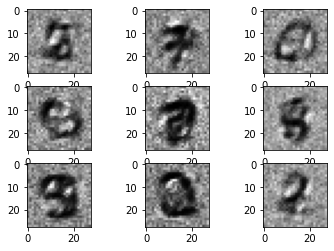

Epoch: 64
	Batch: 1	Discriminator Error: 0.295270	Generator Error: 4.303121
	Batch: 200	Discriminator Error: 0.159417	Generator Error: 3.453571
	Batch: 400	Discriminator Error: 0.278600	Generator Error: 3.818870
	Batch: 600	Discriminator Error: 0.430092	Generator Error: 3.231047


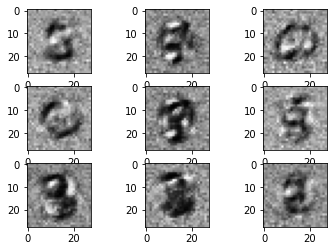

Epoch: 65
	Batch: 1	Discriminator Error: 0.331129	Generator Error: 3.755619
	Batch: 200	Discriminator Error: 0.290074	Generator Error: 3.734114
	Batch: 400	Discriminator Error: 0.271882	Generator Error: 3.882100
	Batch: 600	Discriminator Error: 0.363513	Generator Error: 3.697424


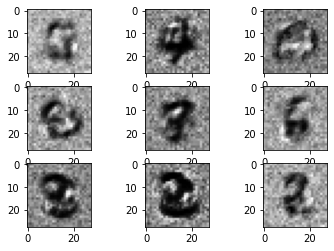

Epoch: 66
	Batch: 1	Discriminator Error: 0.279715	Generator Error: 3.364070
	Batch: 200	Discriminator Error: 0.354612	Generator Error: 3.984686
	Batch: 400	Discriminator Error: 0.305313	Generator Error: 3.793355
	Batch: 600	Discriminator Error: 0.322170	Generator Error: 3.489477


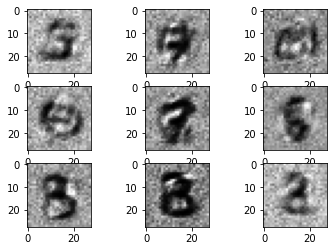

Epoch: 67
	Batch: 1	Discriminator Error: 0.343646	Generator Error: 3.464455
	Batch: 200	Discriminator Error: 0.303581	Generator Error: 3.166954
	Batch: 400	Discriminator Error: 0.302092	Generator Error: 3.439256
	Batch: 600	Discriminator Error: 0.533842	Generator Error: 3.140975


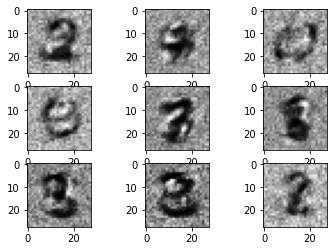

Epoch: 68
	Batch: 1	Discriminator Error: 0.464268	Generator Error: 3.529607
	Batch: 200	Discriminator Error: 0.193831	Generator Error: 4.403922
	Batch: 400	Discriminator Error: 0.351500	Generator Error: 3.970573
	Batch: 600	Discriminator Error: 0.379768	Generator Error: 3.580207


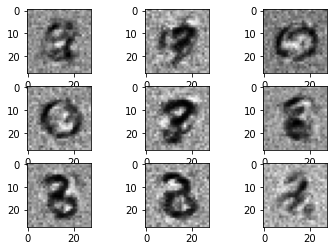

Epoch: 69
	Batch: 1	Discriminator Error: 0.417099	Generator Error: 3.999810
	Batch: 200	Discriminator Error: 0.346553	Generator Error: 3.809808
	Batch: 400	Discriminator Error: 0.463767	Generator Error: 3.492160
	Batch: 600	Discriminator Error: 0.201977	Generator Error: 3.802601


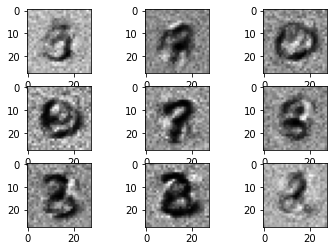

Epoch: 70
	Batch: 1	Discriminator Error: 0.431038	Generator Error: 3.977627
	Batch: 200	Discriminator Error: 0.275092	Generator Error: 3.619699
	Batch: 400	Discriminator Error: 0.212602	Generator Error: 3.961403
	Batch: 600	Discriminator Error: 0.247896	Generator Error: 4.088561


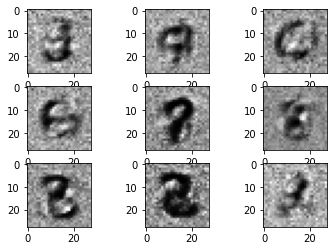

Epoch: 71
	Batch: 1	Discriminator Error: 0.289950	Generator Error: 4.027544
	Batch: 200	Discriminator Error: 0.456515	Generator Error: 3.780489
	Batch: 400	Discriminator Error: 0.286326	Generator Error: 3.549942
	Batch: 600	Discriminator Error: 0.452704	Generator Error: 3.231863


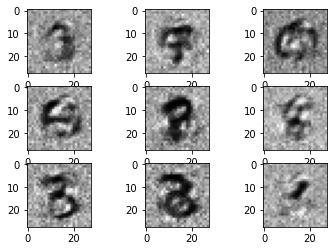

Epoch: 72
	Batch: 1	Discriminator Error: 0.224833	Generator Error: 3.266767
	Batch: 200	Discriminator Error: 0.365189	Generator Error: 3.604465
	Batch: 400	Discriminator Error: 0.376031	Generator Error: 3.374985
	Batch: 600	Discriminator Error: 0.327943	Generator Error: 4.030270


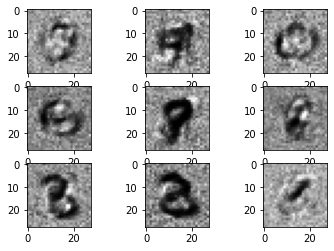

Epoch: 73
	Batch: 1	Discriminator Error: 0.307581	Generator Error: 3.984105
	Batch: 200	Discriminator Error: 0.343616	Generator Error: 3.996026
	Batch: 400	Discriminator Error: 0.308051	Generator Error: 4.214406
	Batch: 600	Discriminator Error: 0.239437	Generator Error: 3.004233


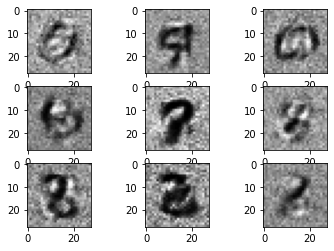

Epoch: 74
	Batch: 1	Discriminator Error: 0.453489	Generator Error: 3.344121
	Batch: 200	Discriminator Error: 0.218216	Generator Error: 3.777618
	Batch: 400	Discriminator Error: 0.246716	Generator Error: 4.029169
	Batch: 600	Discriminator Error: 0.273724	Generator Error: 3.448742


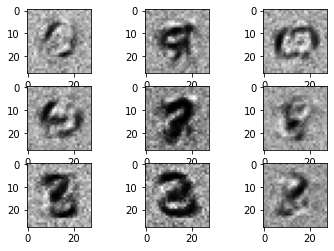

Epoch: 75
	Batch: 1	Discriminator Error: 0.404786	Generator Error: 3.667576
	Batch: 200	Discriminator Error: 0.361752	Generator Error: 3.363676
	Batch: 400	Discriminator Error: 0.450303	Generator Error: 3.687007
	Batch: 600	Discriminator Error: 0.246991	Generator Error: 3.674199


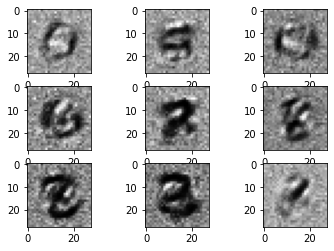

Epoch: 76
	Batch: 1	Discriminator Error: 0.267465	Generator Error: 3.780738
	Batch: 200	Discriminator Error: 0.222753	Generator Error: 4.525774
	Batch: 400	Discriminator Error: 0.260861	Generator Error: 3.684003
	Batch: 600	Discriminator Error: 0.474308	Generator Error: 4.075716


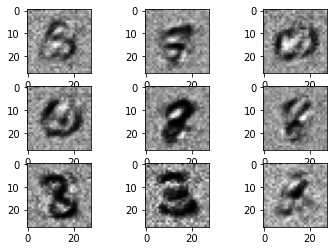

Epoch: 77
	Batch: 1	Discriminator Error: 0.338033	Generator Error: 3.932139
	Batch: 200	Discriminator Error: 0.431956	Generator Error: 3.511127
	Batch: 400	Discriminator Error: 0.291225	Generator Error: 3.500598
	Batch: 600	Discriminator Error: 0.229286	Generator Error: 4.292265


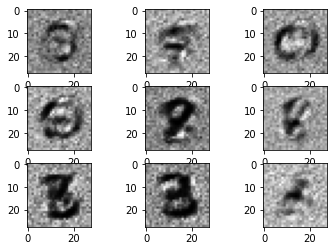

Epoch: 78
	Batch: 1	Discriminator Error: 0.308101	Generator Error: 4.068877
	Batch: 200	Discriminator Error: 0.314385	Generator Error: 3.315301
	Batch: 400	Discriminator Error: 0.362175	Generator Error: 3.562266
	Batch: 600	Discriminator Error: 0.353547	Generator Error: 3.888792


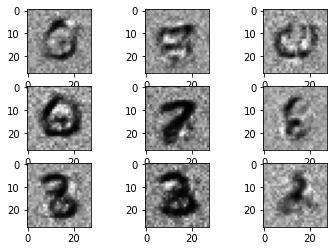

Epoch: 79
	Batch: 1	Discriminator Error: 0.216920	Generator Error: 4.121645
	Batch: 200	Discriminator Error: 0.481721	Generator Error: 3.289102
	Batch: 400	Discriminator Error: 0.312931	Generator Error: 4.036880
	Batch: 600	Discriminator Error: 0.347015	Generator Error: 3.949863


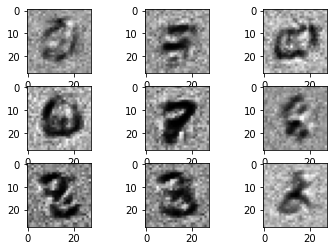

In [106]:
for epoch in range(epochs):
    print("Epoch: %d" %(epoch))

    for step, batch in enumerate(train_dataloader):
        
        batch = [t.to(device) for t in batch]

        real_batch = batch[0]

        N = real_batch.size(0)

        # 1. Train Discriminator
        real_data = real_batch.reshape(batch_size,784)
        fake_data = model_gen(noise(batch_size).to(device))
        d_error, d_pred_real, d_pred_fake = train_discriminator(optimizer_d, criterion_d, real_data, fake_data)

        # 2. Train Generator

        fake_data = model_gen(noise(batch_size).to(device))
        g_error = train_generator(optimizer_g, criterion_g, fake_data)

        # Display Stats every few batches
        if (step + 1) % 200 == 0 or step == 0: 
            print("\tBatch: %d\tDiscriminator Error: %f\tGenerator Error: %f" %(step + 1, d_error, g_error))
            generator_error.append(g_error)
            discriminator_error.append(d_error)
            if ((step + 1) % 600 == 0):
                validation_images = model_gen(val_noise.to(device)).detach().cpu().numpy()
                fig, axs = plt.subplots(3, 3)
                for i in range(9):
                    show_img(validation_images[i], axs, int(i/3), i%3)
                plt.show()

In [107]:
torch.save(model_gen.state_dict(), '/content/drive/MyDrive/model_gen.pt')
torch.save(model_dis.state_dict(), '/content/drive/MyDrive/model_dis.pt')

In [108]:
path = '/content/drive/MyDrive/model_gen.pt'
model_gen.load_state_dict(torch.load(path))

<All keys matched successfully>

In [109]:
path = '/content/drive/MyDrive/model_dis.pt'
model_dis.load_state_dict(torch.load(path))

<All keys matched successfully>

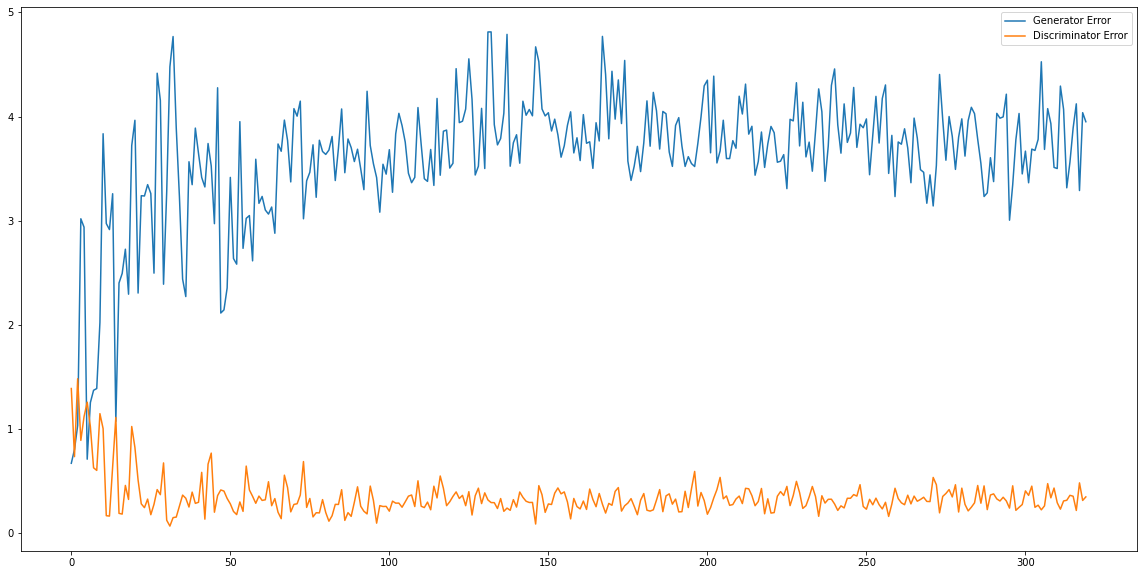

In [110]:
plt.figure(figsize=(20, 10))
plt.plot(generator_error, label="Generator Error")
plt.plot(discriminator_error, label="Discriminator Error")
plt.legend()
plt.show()

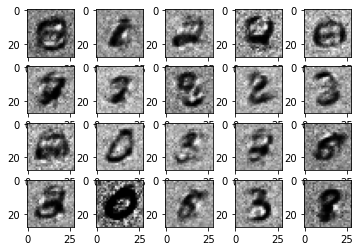

In [111]:
test_images = model_gen(noise(20).to(device)).detach().cpu().numpy()
fig, axs = plt.subplots(4, 5)
for i in range(20):
    show_img(test_images[i], axs, int(i/5), i%5)
plt.show()